***
# <font color='purple' size=10>Statistics With Language 'R':</font>
# <font color='purple'>Probability and Sampling</font>
***

# <font color='lightgreen'> Knowing The Data</font>
***

## <font color='lightgreen'> Project Dataset</font>
***

### National Household Sample Survey - 2015

The **National Household Sample Survey - PNAD** investigates annually, on a permanent basis, general characteristics of the population, education, work, income and housing and others, with variable frequency, according to the information needs of the country , such as features on migration, fertility, nuptiality, health, food security, among other topics. The survey of these statistics constitutes, over the 49 years of research, an important instrument for formulating, validating and evaluating policies aimed at socioeconomic development and improving living conditions in Brazil.

### Data Source

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

***
### Variables used

### Income
***

Monthly income from main job for people aged 10 or over.

### Age
***

Age of the resident on the reference date in years.

### Height (own elaboration)
***

Resident's height in meters.

### UF
***

|Code|Description|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazons|
|14|Roraima|
|15|Para|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Holy Spirit|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sex
***

|Code|Description|
|---|---|
|0|Masculine|
|1|Feminine|

### Years of Study
***

|Code|Description|
|---|---|
|1|No education and less than 1 year|
|2|1 year|
|3|2 years|
|4|3 years|
|5|4 years|
|6|5 years|
|7|6 years|
|8|7 years|
|9|8 years|
|10|9 years|
|11|10 years|
|12|11 years|
|13|12 years old|
|14|13 years old|
|15|14 years old|
|16|15 years or more|
|17|Not determined|
||Not applicable|

### Color
***

|Code|Description|
|---|---|
|0|Indigenous|
|2|White|
|4|Black|
|6|Yellow|
|8|Brown|
|9|No statement|

***
## <font color='purple'>Imports:</font>


In [204]:
library(ggplot2)
library(dplyr)
library(DescTools)
library(glue)

***
### <font color='purple'>Configs:</font>

In [2]:
options(repr.plot.width=10, repr.plot.height=5)

***
## <font color='lightgreen'>Loading Project Dataset:</font>

In [3]:
dataset <- read.csv('dataset_IBGE.csv')

In [4]:
head(dataset)

,UF,Sex,Age,Color,Years.of.Studies,Income,Height
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


***
# <font color='lightgreen'> Distributions and Probabilities</font>

***
### <font color='purple'>Example Problem:</font>

In a competition to fill a data scientist position we have a total of **10 multiple choice questions** with **3 possible alternatives** in each question. **Each question has the same value.** Suppose a candidate decides to take the plunge without having studied anything at all. He decides to take the test blindfolded and guess all the answers. Assuming that the test **is worth 10 points and the cut-off score is 5**, obtain the probability of this candidate **getting 5 questions correct** and also the probability of this candidate **moving on to the next stage of the selection process**.

***
### <font color='lightgreen'>Binomial Distribution</font>

A **binomial** event is characterized by the possibility of occurrence of only two categories. These categories together represent the entire sample space, and are also mutually exclusive, that is, the occurrence of one implies the non-occurrence of the other.

In statistical analysis, the most common use of the binomial distribution is in solving problems involving **success** and **failure** situations.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Where:

$p$ = probability of success

$q = (1 - p)$ = probability of failure

$n$ = number of events studied

$k$ =number of desired events that are successful

### Binomial Experiment

1. Carrying out $n$ identical tests.

2. The tests are independent.

3. Only two results are possible, example: True or false; Heads or tails; Success or failure.

4. The probability of success is represented by $p$ and the probability of failure by $1-p=q$. These probabilities do not change from test to test.

### Mean of the binomial distribution

The expected value or the mean of the binomial distribution is equal to the number of experiments carried out multiplied by the chance of the event occurring.

# $$\mu = n \times p$$

### Standard deviation of the binomial distribution

The standard deviation is the product of the number of experiments, the probability of success, and the probability of failure.

# $$\sigma = \sqrt{n \times p \times q}$$

### Combinations

Number of combinations of $n$ objects, taken $k$ each time, is:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

By definition

## $$0! = 1$$

***
## <font color='purple'>Example: Mega Sena</font>

In a Mega Sena lottery ticket we have a total of 60 numbers to choose from where the minimum bet is six numbers. If you are curious, decide to calculate the probability of winning the Mega Sena with just one game. To do this we need to know how many combinations of six numbers can be formed with the 60 numbers available.

In [5]:
combinations <- choose(60, 6)
combinations

[1] 50063860

In [6]:
probability <- 1 / combinations
probability

[1] 1.997449e-08

***
### <font color='purple'>Example Problem: Data Scientist</font>

In a competition to fill a data scientist position we have a total of **10 multiple choice questions** with **3 possible alternatives** in each question. **Each question has the same value.** Suppose a candidate decides to take the plunge without having studied anything at all. He decides to take the test blindfolded and guess all the answers. Assuming that the test **is worth 10 points and the cut-off score is 5**, obtain the probability of this candidate **getting 5 questions correct** and also the probability of this candidate **moving on to the next stage of the selection process**.

### number of trials ($n$)

In [7]:
n <- 10
n

[1] 10

### probability of success ($p$)

In [8]:
p <- 1/3
p

[1] 0.3333333

### probability of failure ($q$)

In [9]:
q <- 1 - p
q

[1] 0.6666667

### total number of events to be successful ($k$)

In [10]:
k <- 5
k

[1] 5

### Solution 1

In [11]:
probability <- choose(n, k) * (p ** k) * (q **(n-k))
probability

[1] 0.1365645

### Solution 2

In [12]:
dbinom(x=k, size=n, prob=p)

[1] 0.1365645

### Get the probability of the candidate passing

### $$P(to hit \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [13]:
probability_passing <- pbinom(q=4, size=10, prob=p, lower.tail=FALSE, log.p=FALSE)
probability_passing
round(probability_passing, 4) * 100

[1] 0.2131281

[1] 21.31

***
### <font color='purple'>Example Problem: Scavenger Hunt</font>

A city in the interior holds a contest every year to raise funds for the city's hospital. In the last competition it is known that the **proportion of female participants was 60%**. **The total number of teams, with 12 members, registered in this year's competition is 30**. With the information above, answer: How many teams should be formed by **8 women**?

In [14]:
p <- 0.6
p

[1] 0.6

In [15]:
n <- 12
n

[1] 12

In [16]:
k <- 8
k

[1] 8

In [17]:
probability <- dbinom(x=k, size=n, prob=p)
probability

[1] 0.2128409

In [18]:
teams_women <- 30 * probability
teams_women
round(teams_women)

[1] 6.385228

[1] 6

***
## <font color='lightgreen'>Poisson Distribution</font>

It is used to describe the number of occurrences in a specific time or space interval. Events are characterized by the possibility of counting successes, but the inability to count failures.

As examples of processes where we can apply the Poisson distribution, we have the determination of the number of customers that enter a store at a given time, the number of cars that arrive at a drive-thru of a cafeteria at lunch time, the determination of the number of accidents recorded on a stretch of road, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Where:

$e$ = constant whose approximate value is 2,718281828459045

$\mu$ = represents the average number of occurrences in a given interval of time or space

$k$ = number of successes in the desired range

### Poisson Experiment

1. The probability of an occurrence is the same throughout the observed interval.

2. The number of occurrences in a given interval is independent of the number of occurrences in other intervals.

3. The probability of an occurrence is the same in intervals of equal length.

### Mean of the Poisson distribution

# $$\mu$$

### Standard deviation of the Poisson distribution

# $$\sigma = \sqrt{\mu}$$

### Constant whose approximate

In [19]:
e <- exp(1)
e

[1] 2.718282

***
### <font color='purple'>Example Problem: Delivery</font>

A restaurant receives on average **20 orders per hour**. What is the chance that, at a given time chosen at random, the restaurant will receive **15 orders**?

In [20]:
mean <- 20
mean

[1] 20

In [21]:
k <- 15
k

[1] 15

In [22]:
probability <- dpois(x=k, lambda=mean)
probability
round(probability, 4) * 100

[1] 0.05164885

[1] 5.16

***
### <font color='purple'>Example Problem: Bakery</font>

The average number of customers entering a bakery **per hour is 20**. Find the probability that, in the next hour, **exactly 25 customers will enter.**

In [23]:
mean <- 20
mean

[1] 20

In [24]:
k <- 25
k

[1] 25

In [25]:
probability <- dpois(x=k, lambda=mean)
probability
round(probability, 4) * 100

[1] 0.04458765

[1] 4.46

***
## <font color='lightgreen'>Normal Distribution</font>

The normal distribution is one of the most used in statistics. It is a continuous distribution, where the frequency distribution of a quantitative variable is bell-shaped and symmetrical in relation to its mean.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Important Features

1. It is symmetrical around the mean;

2. The area under the curve corresponds to proportion 1 or 100%;

3. Central tendency measures (mean, median and mode) have the same value;

4. The extremes of the curve tend to infinity in both directions and, theoretically, never touch the $x$ axis;

5. Standard deviation defines the flatness and width of the distribution. Wider and flatter curves have higher standard deviation values;

6. The distribution is defined by its mean and standard deviation;

7. The probability will always be equal to the area under the curve, delimited by the lower and upper limits.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Where:

$x$ = Normal variable

$\sigma$ = Stardard Deviation

$\mu$ = Mean

To obtain the area above, simply calculate the integral of the function for the determined intervals. According to the equation below:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Where:

$x$ = Normal Variable

$\sigma$ = Standard Deviation

$\mu$ = Mean

$L_i$ = Inferior limit

$L_s$ = Superior limit

### Standardized tables

Standardized tables were created to facilitate obtaining the values of the areas under the normal curve and eliminate the need to solve defined integrals.

To consult the values in a standardized table, we simply transform our variable into a standardized variable $Z$.

This variable $Z$ represents the deviation in standard deviations of a value of the original variable in relation to the mean.

# $$Z = \frac{x-\mu}{\sigma}$$

Where:

$x$ = Normal Varible with Mean $\mu$ and Standard Deviation $\sigma$

$\sigma$ = Standard Deviation

$\mu$ = Mean

### Building standardized normal table

In [26]:
Z <- seq(0, 3.99, by=0.01)
probability_ <- pnorm(Z)
table_standard_normal <- matrix(probability_, ncol=10, byrow=TRUE)
colnames(table_standard_normal) <- format(seq(0.00, 0.09, by=0.01))
rownames(table_standard_normal) <- format(seq(0.00, 3.90, by=0.10), digits = 2, nsmall = 2)
table_standard_normal

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000000,0.5039894,0.5079783,0.5119665,0.5159534,0.5199388,0.5239222,0.5279032,0.5318814,0.5358564
0.10,0.5398278,0.5437953,0.5477584,0.5517168,0.5556700,0.5596177,0.5635595,0.5674949,0.5714237,0.5753454
0.20,0.5792597,0.5831662,0.5870644,0.5909541,0.5948349,0.5987063,0.6025681,0.6064199,0.6102612,0.6140919
0.30,0.6179114,0.6217195,0.6255158,0.6293000,0.6330717,0.6368307,0.6405764,0.6443088,0.6480273,0.6517317
0.40,0.6554217,0.6590970,0.6627573,0.6664022,0.6700314,0.6736448,0.6772419,0.6808225,0.6843863,0.6879331
0.50,0.6914625,0.6949743,0.6984682,0.7019440,0.7054015,0.7088403,0.7122603,0.7156612,0.7190427,0.7224047
0.60,0.7257469,0.7290691,0.7323711,0.7356527,0.7389137,0.7421539,0.7453731,0.7485711,0.7517478,0.7549029
0.70,0.7580363,0.7611479,0.7642375,0.7673049,0.7703500,0.7733726,0.7763727,0.7793501,0.7823046,0.7852361
0.80,0.7881446,0.7910299,0.7938919,0.7967306,0.7995458,0.8023375,0.8051055,0.8078498,0.8105703,0.8132671
0.90,0.8159399,0.8185887,0.8212136,0.8238145,0.8263912,0.8289439,0.8314724,0.8339768,0.8364569,0.8389129


The table above gives the area under the curve between $-\infty$ and $Z$ standard deviations above the mean. Remembering that because these are standardized values, we have $\mu = 0$.

***
### <font color='purple'>Example Problem: What's your height</font>

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.
>
> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    
>
> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.


In a study on the heights of residents of a city, it was found that the data set follows an **approximately normal distribution**, with **mean 1.70** and **standard deviation of 0.1**. With this information obtain the following set of probabilities:

> **A.** probability that a person, selected at random, is less than 1.80 meters tall.
>
> **B.** probability of a person, selected at random, being between 1.60 meters and 1.80 meters.
>
> **C.** probability of a person, selected at random, being taller than 1.90 meters.

***
### <font color='purple'>Problem: 'A'</font>

> **A.** probability that a person, selected at random, is less than 1.80 meters tall.

In [27]:
mean <- 1.70
mean

[1] 1.7

In [28]:
x <- 1.80
x

[1] 1.8

In [29]:
sd <- 0.10
sd

[1] 0.1

In [30]:
Z <- (x - mean) / sd
Z

[1] 1

In [31]:
probability_A <- pnorm(Z)
round(probability_A, 4) * 100

[1] 84.13

***
### <font color='purple'>Problem: 'B'</font>

> **B.** probability of a person, selected at random, being between 1.60 meters and 1.80 meters.


In [32]:
mean <- 1.70
mean

[1] 1.7

In [33]:
sd <- 0.10
sd

[1] 0.1

In [34]:
x_sup <- 1.80
x_inf <- 1.60
x_sup
x_inf

[1] 1.8

[1] 1.6

In [35]:
Z_superior <- (x_sup - mean) / sd
Z_inferior <- (x_inf - mean) / sd
Z_superior
Z_inferior

[1] 1

[1] -1

In [36]:
probability_B <- pnorm(Z_superior) - pnorm(Z_inferior)
round(probability_B, 4) * 100

[1] 68.27

***
### <font color='purple'>Problem: 'C'</font>

> **C.** probability of a person, selected at random, being taller than 1.90 meters.

In [37]:
mean <- 1.70
mean

[1] 1.7

In [38]:
sd <- 0.10
sd

[1] 0.1

In [39]:
x <- 1.90

In [40]:
Z <- (x - mean) / sd
Z

[1] 2

In [41]:
probability_C <- pnorm(-Z)
round(probability_C, 4) * 100

[1] 2.28

***
### <font color='purple'>List of Examples</font>

***
### <font color='purple'>Statistics Test</font>

The application of a **statistics test** in a competition presented a set of normally distributed grades. It was found that the set of notes had an **average of 70 and a standard deviation of 5 points**. What is the probability that a student, **selected at random, will have a grade lower than 85?**

In [42]:
mean <- 70
mean

[1] 70

In [43]:
sd <- 5
sd

[1] 5

In [44]:
x <- 85
x

[1] 85

In [45]:
Z <- (x - mean) / sd
Z

[1] 3

In [46]:
Probability <- pnorm(Z)
round(Probability, 4) * 100

[1] 99.87

***
### <font color='purple'>Daily Billing</font>

The daily revenue of an app driver follows an approximately normal distribution, with **average 300.00 Reais** and **standard deviation equal to 50.00 Reais**. Find the odds that on a random day the driver will win:

**1-Between 250.00 and 350.00**

**2-Between 400.00 and 500.00**

***
### <font color='purple'>Problem: '1'</font>

In [47]:
mean <- 300
mean

[1] 300

In [48]:
sd <- 50
sd

[1] 50

In [49]:
x_sup <- 350
x_sup
x_inf <- 250
x_inf

[1] 350

[1] 250

In [50]:
Z_sup <- (x_sup - mean) / sd
Z_sup
Z_inf <- (x_inf - mean) / sd
Z_inf

[1] 1

[1] -1

In [51]:
probability_1 <- pnorm(Z_sup) - pnorm(Z_inf)
round(probability_1, 4) * 100

[1] 68.27

***
### <font color='purple'>Problem: '2'</font>

In [52]:
mean <- 300
mean

[1] 300

In [53]:
sd <- 50
sd

[1] 50

In [54]:
x_sup <- 500
x_sup
x_inf <- 400
x_inf

[1] 500

[1] 400

In [55]:
Z_sup <- (x_sup - mean) / sd
Z_sup
Z_inf <- (x_inf - mean) / sd
Z_inf

[1] 4

[1] 2

In [56]:
probability_2 <- pnorm(Z_sup) - pnorm(Z_inf)
round(probability_2, 4) * 100

[1] 2.27

***
### <font color='purple'>Classifying the athletes</font>

The weights of fighters at an MMA gym, with **500 athletes**, are normally distributed, with an average of **80.5 kg and a standard deviation of 12.2 kg**. Find the number of athletes at this gym who fall into the light weight category, which ranges from **65.7 kg to 70.3 kg.**

In [57]:
mean <- 80.50
mean

[1] 80.5

In [58]:
sd <- 12.20
sd

[1] 12.2

In [59]:
x_sup <- 70.30
x_sup
x_inf <- 65.70
x_inf

[1] 70.3

[1] 65.7

In [60]:
Z_sup <- (x_sup - mean) / sd
Z_sup
Z_inf <- (x_inf - mean) / sd
Z_inf

[1] -0.8360656

[1] -1.213115

In [61]:
probability <- pnorm(Z_sup) - pnorm(Z_inf)
probability

[1] 0.08901603

In [62]:
numbers_athletes <- 500 * probability
round(numbers_athletes)

[1] 45

***
### <font color='purple'>Lifespan</font>

Inmetro verified that incandescent lamps from the manufacturer XPTO have a normally distributed useful life, with a ***average equal to 720 days and a standard deviation equal to 30 days***. Calculate the probability that a randomly chosen light bulb will last:

**1-Between 650 and 750 days**

**2-More than 800 days**

**3-Less than 700 days**

***
### <font color='purple'>Problem: '1'</font>

In [63]:
mean <- 720
mean

[1] 720

In [64]:
sd <- 30
sd

[1] 30

In [65]:
x_sup <- 750
x_sup
x_inf <- 650
x_inf

[1] 750

[1] 650

In [66]:
Z_sup <- (x_sup - mean) / sd
Z_sup
Z_inf <- (x_inf - mean) / sd
Z_inf

[1] 1

[1] -2.333333

In [67]:
probability_1 <- pnorm(Z_sup) - pnorm(Z_inf)
round(probability_1, 4) * 100

[1] 83.15

***
### <font color='purple'>Problem: '2'</font>

In [68]:
mean <- 720
mean

[1] 720

In [69]:
sd <- 30
sd

[1] 30

In [70]:
x <- 800
x

[1] 800

In [71]:
Z <- (x - mean) / sd
Z

[1] 2.666667

In [72]:
probability_2 <- pnorm(-Z)
round(probability_2, 4) * 100

[1] 0.38

***
### <font color='purple'>Problem: '3'</font>

In [73]:
mean <- 720
mean

[1] 720

In [74]:
sd <- 30
sd

[1] 30

In [75]:
x <- 700
x

[1] 700

In [76]:
Z <- (x - mean) / sd
Z

[1] -0.6666667

In [77]:
probability_3 <- pnorm(Z)
round(probability_3, 4) * 100

[1] 25.25

***
### <font color='purple'>Test Time</font>

The time to complete a public competition test is normally distributed, with an ***average of 80 minutes*** and ***standard deviation of 10 minutes***. Suppose that one of the test rooms has 60 candidates and that the test lasts 90 minutes. How many candidates do you think will not be able to complete the test in the given time?

Note: Use the round() function to round the result obtained.

In [78]:
mean <- 80
mean

[1] 80

In [79]:
sd <- 10
sd

[1] 10

In [80]:
x <- 90
x

[1] 90

In [81]:
Z <- (x - mean) / sd
Z

[1] 1

In [82]:
probability <- pnorm(-Z)
probability

[1] 0.1586553

In [83]:
n <- 60 * probability
round(n)

[1] 10

***
# <font color='lightgreen'>Sampling</font>

***
## <font color='lightgreen'>Population and Sample</font>

### Population
Set of all elements of interest in a study. Several elements can make up a population, for example: people, ages, heights, cars, etc.

Regarding size, populations can be limited (finite populations) or unlimited (infinite populations).

### Finite populations

They allow the counting of its elements. Examples include the number of employees in a company, the number of students in a school, etc.

### Infinite populations

It is not possible to count its elements. As examples, we have the number of portions that can be extracted from sea water for analysis, temperature measured at each point in a territory, etc.

<font color=red>When the elements of a population can be counted, but present a very large quantity, the population is assumed to be infinite.</font>.

### Sample
Representative subset of the population.

The numerical attributes of a population, such as its mean, variance and standard deviation, are known as **parameters**. The main focus of statistical inference is precisely to generate estimates and test hypotheses about population parameters using sample information.

***
### <font color='lightgreen'>Criteria For Using a Sample</font>

### Infinite populations

The study would never come to an end. It is not possible to investigate all elements of the population.

### Destructive testing

Studies where the evaluated elements are completely consumed or destroyed. Example: useful life tests, automobile crash safety tests.

### Quick results

Research that needs more agility in dissemination. Example: opinion polls, research involving public health problems.

### High costs

When the population is finite but very numerous, the cost of a census can make the process unfeasible.

***
## <font color='lightgreen'>Simple Random Sampling</font>

It is one of the main ways to extract a sample from a population. The fundamental requirement of this type of approach is that each element of the population has the same chances of being selected to be part of the sample.

***
### <font color='purple'>Extracting a Simple Sample From The Dataset</font>

In [84]:
nrow(dataset)

[1] 76840

In [85]:
mean(dataset$Income)

[1] 2000.383

In [86]:
set.seed(333)
dataset_sample <- sample_n(dataset, 1000)

In [87]:
nrow(dataset_sample)

[1] 1000

In [88]:
mean(dataset_sample$Income)

[1] 1983.471

### The Original Dataset

In [89]:
cbind('Frequency'=table(dataset$Sex),'Percente(%)'=prop.table(table(dataset$Sex)) * 100)

,Frequency,Percente(%)
0,53250,69.29984
1,23590,30.70016


### The Sample Dataset

In [90]:
cbind('Frequency'=table(dataset_sample$Sex),'Percente(%)'=prop.table(table(dataset_sample$Sex)) * 100)

,Frequency,Percente(%)
0,686,68.6
1,314,31.4


***
## <font color='lightgreen'>Stratified Sampling</font>

It is an improvement on the simple random sampling process. This method proposes the division of the population into subgroups of elements with similar characteristics, that is, more homogeneous groups. With these subgroups separated, the simple random sampling technique is applied within each subgroup individually.

***
## <font color='lightgreen'>Cluster Sampling</font>

It also aims to improve the simple random sampling criterion. In cluster sampling, subgroups are also created, but they will not be homogeneous as in stratified sampling. In cluster sampling, the subgroups will be heterogeneous, where simple or stratified random sampling will then be applied.

A very common example of application of this type of technique is in the division of the population into territorial groups, where the elements investigated will have quite varied characteristics.

***
## <font color='lightgreen'>Estimation</font>

It is the way of making generalized assumptions about the parameters of a population based on information from a sample.

- **Parameters** are the numerical attributes of a population, such as the mean, standard deviation, etc.

- **Estimate** is the value obtained for a given parameter from data from a sample of the population.

***
## <font color='lightgreen'>Central Limit Theorem</font>

> The **Central Limit Theorem** states that, with increasing sample size, the distribution of sample means approaches a normal distribution with a mean equal to the population mean and standard deviation equal to the standard deviation of the original variable divided by the square root of the sample size. This fact is guaranteed for $n$ greater than or equal to 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

The standard deviation of the sample means is known as **standard error of the mean**

### Understanding the Central Limit Theorem

In [91]:
n <- 2000
total_samples <- 1500

In [92]:
for (i in 1:total_samples){
    if(i==1){
        sample_dataset <- data.frame('Sample_1'= sample(dataset$Age, n))
    }else{
        sample_dataset[paste('Sample_', i)] <- sample(dataset$Age, n)
    }
}
head(sample_dataset)

,Sample_1,Sample_ 2,Sample_ 3,Sample_ 4,Sample_ 5,Sample_ 6,Sample_ 7,Sample_ 8,Sample_ 9,Sample_ 10,⋯,Sample_ 1491,Sample_ 1492,Sample_ 1493,Sample_ 1494,Sample_ 1495,Sample_ 1496,Sample_ 1497,Sample_ 1498,Sample_ 1499,Sample_ 1500
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,23,22,39,38,39,32,44,47,30,⋯,47,35,54,48,56,29,30,63,34,52
2,37,36,23,46,52,45,46,42,34,74,⋯,45,50,40,74,39,59,35,36,54,54
3,47,48,35,66,44,22,38,42,22,54,⋯,42,43,43,52,41,40,43,45,37,75
4,45,60,47,29,48,48,44,44,43,33,⋯,59,58,34,50,52,48,48,30,44,24
5,28,44,60,46,23,36,44,36,45,69,⋯,45,44,34,47,58,42,61,55,52,32
6,29,29,44,60,49,39,46,35,59,31,⋯,32,27,40,58,25,52,46,50,44,52


In [93]:
colMeans(sample_dataset)

Sample_1    Sample_ 2    Sample_ 3    Sample_ 4    Sample_ 5    Sample_ 6 
     44.1405      44.1700      44.1860      44.4195      44.2620      43.6630 
   Sample_ 7    Sample_ 8    Sample_ 9   Sample_ 10   Sample_ 11   Sample_ 12 
     44.0170      44.0785      44.0780      44.1440      43.9565      43.8455 
  Sample_ 13   Sample_ 14   Sample_ 15   Sample_ 16   Sample_ 17   Sample_ 18 
     44.0280      43.8000      43.9505      44.2010      44.2130      44.2150 
  Sample_ 19   Sample_ 20   Sample_ 21   Sample_ 22   Sample_ 23   Sample_ 24 
     44.0195      44.0620      44.1795      44.0360      43.8095      44.2050 
  Sample_ 25   Sample_ 26   Sample_ 27   Sample_ 28   Sample_ 29   Sample_ 30 
     43.8640      44.2605      44.0735      44.0670      44.0155      43.4130 
  Sample_ 31   Sample_ 32   Sample_ 33   Sample_ 34   Sample_ 35   Sample_ 36 
     43.9820      44.2220      44.1630      44.0300      43.9795      44.0790 
  Sample_ 37   Sample_ 38   Sample_ 39   Sample_ 40   Sample_ 41   Sample_ 42 
     43.9195      43.9140      44.0430      44.3345      43.6935      43.8480 
  Sample_ 43   Sample_ 44   Sample_ 45   Sample_ 46   Sample_ 47   Sample_ 48 
     44.5640      43.8715      44.1755      44.6590      44.4490      44.3370 
  Sample_ 49   Sample_ 50   Sample_ 51   Sample_ 52   Sample_ 53   Sample_ 54 
     43.8080      43.8120      44.3010      43.8445      43.8850      43.7100 
  Sample_ 55   Sample_ 56   Sample_ 57   Sample_ 58   Sample_ 59   Sample_ 60 
     44.4955      43.7525      44.2400      44.0840      43.3410      44.2615 
  Sample_ 61   Sample_ 62   Sample_ 63   Sample_ 64   Sample_ 65   Sample_ 66 
     43.8540      44.0955      43.6495      43.9235      44.2715      44.3490 
  Sample_ 67   Sample_ 68   Sample_ 69   Sample_ 70   Sample_ 71   Sample_ 72 
     44.2085      44.1070      44.0535      44.0660      44.4425      43.7830 
  Sample_ 73   Sample_ 74   Sample_ 75   Sample_ 76   Sample_ 77   Sample_ 78 
     44.3315      44.0595      44.0375      44.1550      44.5080      43.8715 
  Sample_ 79   Sample_ 80   Sample_ 81   Sample_ 82   Sample_ 83   Sample_ 84 
     44.2040      43.9055      44.3095      43.6585      44.2725      43.8340 
  Sample_ 85   Sample_ 86   Sample_ 87   Sample_ 88   Sample_ 89   Sample_ 90 
     43.4470      44.3635      43.9715      43.9925      44.0455      44.4485 
  Sample_ 91   Sample_ 92   Sample_ 93   Sample_ 94   Sample_ 95   Sample_ 96 
     43.9720      43.9570      44.4175      44.1055      44.6685      44.1595 
  Sample_ 97   Sample_ 98   Sample_ 99  Sample_ 100  Sample_ 101  Sample_ 102 
     44.3445      43.6215      44.1845      43.6410      44.1385      43.8085 
 Sample_ 103  Sample_ 104  Sample_ 105  Sample_ 106  Sample_ 107  Sample_ 108 
     43.9970      43.9870      44.2660      44.0055      43.9720      44.1515 
 Sample_ 109  Sample_ 110  Sample_ 111  Sample_ 112  Sample_ 113  Sample_ 114 
     44.2725      44.4745      44.7870      44.6450      43.9710      43.6710 
 Sample_ 115  Sample_ 116  Sample_ 117  Sample_ 118  Sample_ 119  Sample_ 120 
     43.6210      44.0320      43.8850      44.0285      43.8440      44.0645 
 Sample_ 121  Sample_ 122  Sample_ 123  Sample_ 124  Sample_ 125  Sample_ 126 
     43.5060      44.1195      43.8685      44.3875      43.5860      44.5750 
 Sample_ 127  Sample_ 128  Sample_ 129  Sample_ 130  Sample_ 131  Sample_ 132 
     44.5295      43.6070      43.9595      44.3155      44.6170      43.9145 
 Sample_ 133  Sample_ 134  Sample_ 135  Sample_ 136  Sample_ 137  Sample_ 138 
     44.1790      43.6710      44.1690      44.4705      43.7750      43.8735 
 Sample_ 139  Sample_ 140  Sample_ 141  Sample_ 142  Sample_ 143  Sample_ 144 
     44.1055      43.9150      43.8850      44.4190      44.1900      44.2820 
 Sample_ 145  Sample_ 146  Sample_ 147  Sample_ 148  Sample_ 149  Sample_ 150 
     44.0610      44.6515      43.8550      44.2275      44.2685      44.1950 
 Sample_ 151  Sample_ 152  Sample_ 153  Sample_ 154  S

> The Central Limit Theorem states that, **with increasing sample size, the distribution of sample means approaches a normal distribution** with mean equal to the population mean and standard deviation equal to the standard deviation of the original variable divided by the square root of the sample size. This fact is guaranteed for n greater than or equal to 30.

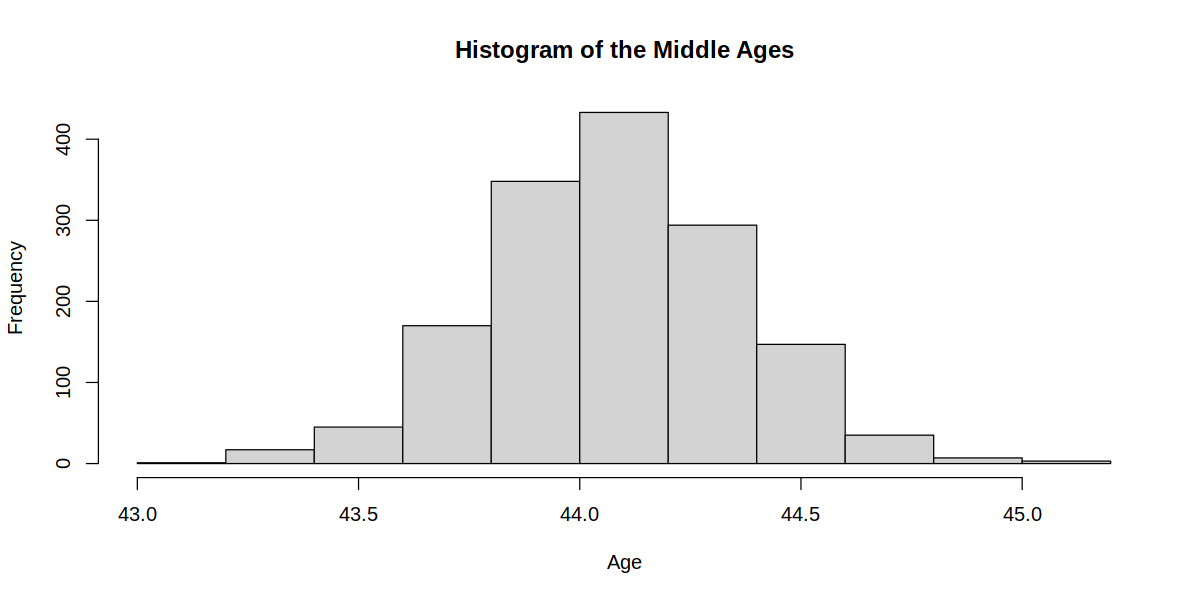

In [94]:
hist(
    x=colMeans(sample_dataset),
    main='Histogram of the Middle Ages',
    xlab='Age',
    ylab='Frequency'
)

> The Central Limit Theorem states that, with increasing sample size, the distribution of sample means approaches a normal distribution **with mean equal to the population mean** and standard deviation equal to the standard deviation of the original variable divided by the square root of the sample size. This fact is guaranteed for n greater than or equal to 30.

In [95]:
mean(dataset$Age)

[1] 44.07142

In [96]:
mean(colMeans(sample_dataset))

[1] 44.07846

> The Central Limit Theorem states that, with increasing sample size, the distribution of sample means approaches a normal distribution with a mean equal to the population mean and **standard deviation equal to the standard deviation of the original variable divided by the root square of the sample size**. This fact is guaranteed for n greater than or equal to 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [97]:
sd(colMeans(sample_dataset))

[1] 0.2810262

In [98]:
sd(dataset$Age) / sqrt(n)

[1] 0.2790743

***
## <font color='lightgreen'>Confidence And Significance Levels</font>

The **confidence level** ($1 - \alpha$) represents the probability of the estimate being correct. In a complementary way, the **significance level** ($\alpha$) expresses the probability of error in the estimate.

The **confidence level** represents the degree of reliability of the estimation result being within a certain range. When we set a **confidence level** of 95% in a survey, for example, we are assuming that there is a 95% probability that the survey results represent reality well, that is, they are correct.

The **confidence level** of an estimate can be obtained from the area under the normal curve as illustrated in the figure below.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

***
## <font color='lightgreen'>Inferential Error</font>

The **inferential error** is defined by the **standard deviation of the sample means** $\sigma_\bar{x}$ and the **confidence level** determined for the process.

#### With known population standard deviation

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### With unknown population standard deviation

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

***
### <font color='purple'>Example Problem: Rice Bags</font>

Suppose that the weights of bags of rice in a food industry are distributed approximately as a normal of **population standard deviation equal to 150 g**. Selecting a **random sample of 20 bags** from a specific batch, an **average weight of 5,050 g** was obtained. Construct a confidence interval for the **population mean** assuming a **significance level of 5%**.

In [99]:
mean <- 5050
mean

[1] 5050

In [100]:
meaningfulness <- 0.05
meaningfulness

[1] 0.05

In [101]:
confidence <- 1 - meaningfulness
confidence

[1] 0.95

In [102]:
Z <- qnorm(0.5 + (confidence / 2))
Z

[1] 1.959964

In [103]:
sd <- 150
sd

[1] 150

In [104]:
n <- 20
n

[1] 20

In [105]:
sigma <- sd/(sqrt(n))
sigma

[1] 33.54102

In [106]:
e <- Z * sigma
e

[1] 65.73919

In [107]:
interval <- c(
    mean - e,
    mean + e
)
interval

[1] 4984.261 5115.739

### Using DescTools to solve the problem

In [108]:
MeanCI(x=5050, sd=sigma, type='norm', conf.level=0.95, sides='two.sided')

mean   lwr.ci   upr.ci 
5050.000 4984.261 5115.739

***
### <font color='purple'>Calculate Dataset</font>

In [109]:
sigma <- sd(dataset$Age) / sqrt(nrow(dataset))
sigma

[1] 0.0450237

In [110]:
MeanCI(x=mean(dataset$Age), sd=sigma, type='norm', conf.level=0.95, sides='two.sided')

mean   lwr.ci   upr.ci 
44.07142 43.98318 44.15967

***
## <font color='purple'> List of Examples</font>

***
## <font color='purple'> Margin of error: Fast Food</font>

To estimate the average amount spent by each customer of a large fast food chain, a sample of **50 customers** was selected. Assuming that the standard deviation value of the population is **R$ 6.00** and that this population is normally distributed, obtain the margin of error for this estimate, for a **confidence level of 95%.**

In [111]:
n <- 50
n

[1] 50

In [112]:
sd <- 6.00
sd

[1] 6

In [113]:
confidence <- 0.95
confidence

[1] 0.95

In [114]:
Z <- qnorm(0.5 + (0.95 / 2))
Z

[1] 1.959964

In [115]:
e <- Z * (sd / (sqrt(n)))
round(e, 2)

[1] 1.66

***
## <font color='purple'> Margin of error: Population Average</font>

Uma amostra aleatória simples de **1976** itens de uma população normalmente distribuída, com desvio padrão igual a **11**, resultou em uma média amostral de **28**. Qual o intervalo de confiança de **90%** para a média populacional?

A simple random sample of **1976** items from a normally distributed population, with standard deviation equal to **11**, resulted in a sample mean of **28**. What is the **90%** confidence interval for the population mean?

In [116]:
n <- 1976
n

[1] 1976

In [117]:
sd <- 11
sd

[1] 11

In [118]:
mean <- 28
mean

[1] 28

In [119]:
sigma <- sd / (sqrt(n))
sigma

[1] 0.2474567

In [120]:
MeanCI(x=mean, sd=sigma, type='norm', conf.level=0.95, sides='two.sided')

mean   lwr.ci   upr.ci 
28.00000 27.51499 28.48501

***
## <font color='purple'> Traveling By Plane</font>

Flights on a given air shuttle have a normally distributed duration, with **average equal to 120 minutes** and **standard deviation equal to 20 minutes**. Answer the following questions:

1-What is the probability of a flight lasting less than 110 minutes?

2-What is the probability of a flight lasting more than 90 minutes?

3-What is the minimum duration of 80% of trips?

Note: In question 3, we need to obtain the Z that satisfies the condition and then transform Z to x.

***
### <font color='purple'>Problem: '1'</font>

1-What is the probability of a flight lasting less than 110 minutes?

In [121]:
mean <- 120
mean

[1] 120

In [122]:
sd <- 20
sd

[1] 20

In [123]:
x <- 110
x

[1] 110

In [124]:
Z <- (x- mean) / sd
Z

[1] -0.5

In [125]:
probability <- pnorm(Z)
round(probability, 4) * 100

[1] 30.85

***
### <font color='purple'>Problem: '2'</font>

2-What is the probability of a flight lasting more than 90 minutes?

In [126]:
mean <- 120
mean

[1] 120

In [127]:
sd <- 20
sd

[1] 20

In [128]:
x <- 90
x

[1] 90

In [129]:
Z <- (x- mean) / sd
Z

[1] -1.5

In [130]:
probability <- pnorm(-Z)
round(probability, 4) * 100

[1] 93.32

***
### <font color='purple'>Problem: '3'</font>

3-What is the minimum duration of 80% of trips?

In [131]:
Z <- -qnorm(0.8)
Z

[1] -0.8416212

In [132]:
x <- Z * sd + mean
round(x, 2)

[1] 103.17

***
## <font color='lightgreen'>Sample Size Calculation</font>

***
## <font color='lightgreen'>Quantitative Variables And Infinite Population</font>

#### With known standard deviation

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### With unknown standard deviation

## $$n = \left(z\frac{s}{e}\right)^2$$

Where:

$z$ = standardized normal variable

$\sigma$ = population standard deviation

$s$ = sample standard deviation

$e$ = inferential error

***
### <font color='purple'>Example Problem: Average income</font>

We are studying the monthly income of heads of households in Brazil. Our supervisor determined that the **maximum error in relation to the average is R$\$$ 100.00**. We know that the **population standard deviation** of this group of workers is **R$\$$ 3,323.39**. For a **95% confidence level**, what should our study sample size be?

In [133]:
Z <- qnorm(0.5 + (0.95 / 2))
Z

[1] 1.959964

In [134]:
sigma <- 3323.39
sigma

[1] 3323.39

In [135]:
e <- 100
e

[1] 100

#### With known standard deviation

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

In [136]:
n <- (Z *(sigma / e)) ** 2
n

[1] 4242.861

In [137]:
round(n)

[1] 4243

***
## <font color='purple'> List of Examples</font>

***
## <font color='purple'>Getting Sample Size #1</font>

The average value spent by customers at a convenience store is **45.50 Reais**. Assuming that the standard deviation of expenses is equal to **15.00 Reais**, what should be the sample size to estimate the population mean, with a significance level of **10%**? Consider that the maximum acceptable error is 10%.

In [138]:
mean <- 45.50
mean

[1] 45.5

In [139]:
sigma <- 15
sigma

[1] 15

In [140]:
e <- 0.1
e <- mean * e
e

[1] 4.55

In [141]:
meaningfulness <- 0.1
meaningfulness

[1] 0.1

In [142]:
confidence <- 1 - meaningfulness
confidence

[1] 0.9

In [143]:
Z <- qnorm(0.5 + (confidence / 2))
Z

[1] 1.644854

In [144]:
n <- (Z * (sigma / e)) ** 2
round(n)

[1] 29

***
## <font color='purple'>Getting Sample Size #2</font>

A sample with **40 tax coupons**, collected randomly in a shopping center, presented a standard deviation of the total paid equal to **42.00 Reais**. The retailers' association needs to estimate the population average of sales, with a maximum error equal to 6.00 Reais and using a confidence level equal to 90%. What is the sample size to be analyzed?

In [145]:
sigma <- 42
sigma

[1] 42

In [146]:
e <- 6
e

[1] 6

In [147]:
Z <- qnorm(0.5 + (0.90 / 2))
Z

[1] 1.644854

In [148]:
n <- (Z *(sigma / e)) ** 2
round(n)

[1] 133

***
## <font color='lightgreen'>Quantitative Variables and Finite Population</font>

#### With known standard deviation

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### With unknown standard deviation

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Where:

$N$ = population size

$z$ = standardized normal variable

$\sigma$ = population standard deviation

$s$ = sample standard deviation

$e$ = inferential error

***
### <font color='purple'>Example Problem: Soft Drink Industry</font>

In a batch of **10,000 cans** of soft drink, a simple random sample of **100 cans** was carried out and the **sample standard deviation of the contents of the cans was equal to 12 ml**. The manufacturer stipulates a **maximum error over the population average of just 5 ml**. To ensure a **95% confidence level** what sample size should be selected for this study?

In [149]:
N <- 10000
N

[1] 10000

In [150]:
Z <- qnorm(0.5 + (0.95 / 2))
Z

[1] 1.959964

In [151]:
s <- 12
s

[1] 12

In [152]:
e <- 5 
e

[1] 5

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [153]:
n <- ((Z ** 2) * (s ** 2) * N) / ((Z ** 2) * (s ** 2) + (e ** 2) * (N - 1))
round(n)

[1] 22

***
### <font color='purple'>Example Problem: Sample of Flour Bags</font>

A flour manufacturer verified that a random sample made up of **200** bags of **25** kg from a batch made up of **2,000** bags showed a sample standard deviation of weight equal to **480** g . Considering a maximum error associated with the population mean equal to **0.3** kg and a confidence level equal to **95**%, what sample size should be selected to obtain a reliable estimate of the population parameter?

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [154]:
N <- 2000 * 25
N

[1] 50000

In [155]:
s <- 480
s

[1] 480

In [156]:
e <- 0.3 * 1000 
e

[1] 300

In [157]:
Z <- qnorm(0.5 + (0.95 / 2))
Z

[1] 1.959964

In [158]:
n <- ((Z ** 2) * (s ** 2) * N) / ((Z ** 2) * (s ** 2) + (e ** 2) * (N - 1))
round(n)

[1] 10

***
## <font color='lightgreen'>Making Estimates From The Dataset</font>

We are studying the **monthly income of heads of households with income up to R$\$$ 5,000.00 in Brazil**. We will determine that the **maximum error in relation to the average is R$\$$ 10.00**. We know that the **population standard deviation** of this group of workers is **R$\$$ 1,082.79** and that the **population average** is **R$\$$ 1,426.54**. For a **95% confidence level**, what should our study sample size be? What is the confidence interval for the mean considering the sample size obtained?

### Building the dataset as specified by the problem

In [159]:
dataset_income5000 <- dataset[dataset$Income <= 5000, ]
head(dataset_income5000)

,UF,Sex,Age,Color,Years.of.Studies,Income,Height
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


### Calculating Sample Size

In [160]:
sigma <- sd(dataset_income5000$Income)
sigma

[1] 1082.795

In [161]:
mean <- mean(dataset_income5000$Income)
mean

[1] 1426.537

In [162]:
Z <- qnorm(0.5 + (0.95 / 2))
Z

[1] 1.959964

In [163]:
e <- 10
e

[1] 10

In [164]:
n <- (Z * (sigma / e)) ** 2
n

[1] 45038.95

In [165]:
sample_size_obtained <- round(n)
sample_size_obtained

[1] 45039

### Calculating The Confidence Interval For The Mean

In [166]:
sigma <- sd(dataset_income5000$Income) / sqrt(n)
sigma 

[1] 5.102135

In [167]:
mean <- mean(dataset_income5000$Income)
mean

[1] 1426.537

In [168]:
MeanCI(x=mean, sd=sigma, type='norm', conf.level=0.95, sides='two.sided')

mean   lwr.ci   upr.ci 
1426.537 1416.537 1436.537

In [169]:
mean <- 1426.53721449472
lwr_ci <- 1416.53721449472
upr_ci <- 1436.53721449472

### Performing a graphic test

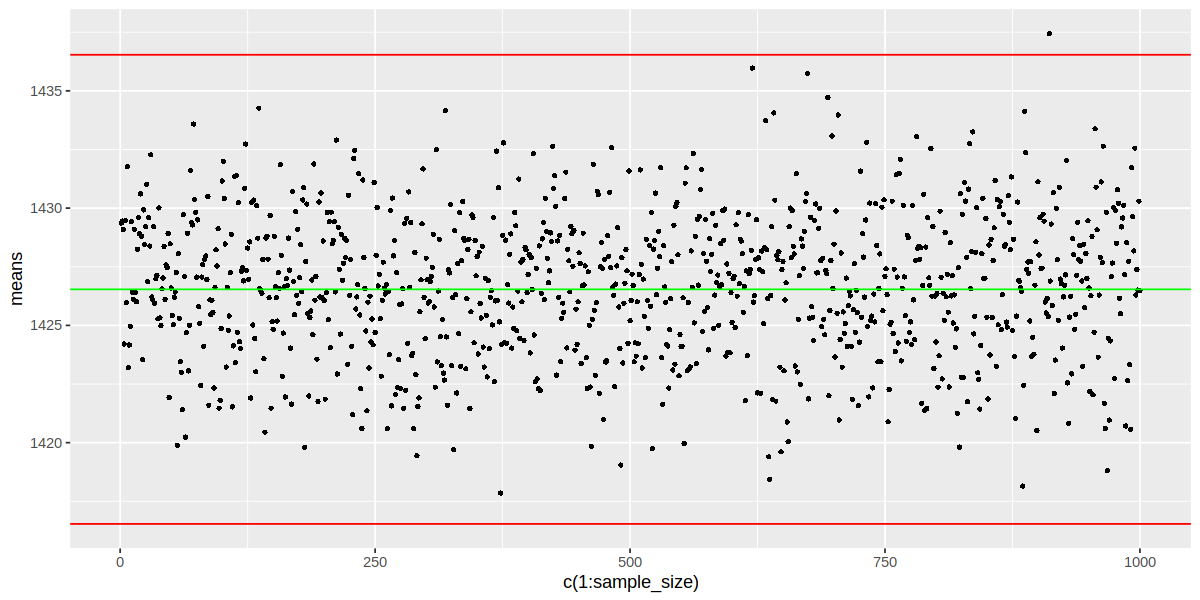

In [170]:
sample_size <- 1000
means <- c()

for(i in 1:sample_size){
    means <- c(means, mean(sample_n(dataset_income5000, n)$Income))
}
means <- data.frame(means)

ggplot(data=means, aes(x=c(1:sample_size), y=means))+
    geom_point(size=1.5, stroke=0)+
    geom_hline(yintercept=mean, color='green')+
    geom_hline(yintercept=lwr_ci, color='red')+
    geom_hline(yintercept=upr_ci, color='red')

***
## <font color='purple'>Problem A</font>

Evaluating our dataset, it is possible to verify that the **proportion of men** as heads of households is almost **70%**. We need to **randomly select groups of 10 individuals** to check the differences between income in each group. What is the **probability of selecting a group that presents the same proportion of the population**, that is, selecting a group that is **composed of 7 men and 3 women**?

In [171]:
dataset_Sex <- cbind('Frequency'=table(dataset$Sex), 'Percent(%)'=prop.table(table(dataset$Sex)) * 100)
rownames(dataset_Sex) <- c('Masculine', 'Feminine')
dataset_Sex

,Frequency,Percent(%)
Masculine,53250,69.29984
Feminine,23590,30.70016


In [172]:
k <- 7
k

[1] 7

In [173]:
n <- 10
n

[1] 10

In [174]:
p <- 0.70
p

[1] 0.7

In [175]:
probability <-  dbinom(k, n, p)
probability

[1] 0.2668279

***
## <font color='purple'>Problem B</font>

Still on the previous question, **how many groups of 10 individuals** would we need to select, randomly, to obtain **100 groups composed of 7 men and 3 women**?

In [176]:
n <- 100 / probability
n <- round(n)
n

[1] 375

***
## <font color='purple'>Problem C</font>

A client commissioned us to carry out a study to evaluate the **income of heads of households in Brazil**. To do this, we need to carry out new data collection, that is, new field research. After meeting with the client, it was possible to list the following set of information:

> A. The research result must be ready in **2 months**;

> B. We will only have **R$\$$ 150,000.00** of resources to carry out the field research; It is
    
> C. A **margin of error not exceeding 10% in relation to the estimated average** would be interesting.

In our experience with studies of this type, we know that the **average cost per individual interviewed is around R$\$$ 100.00**. With this set of facts, evaluate and obtain the following set of information to pass on to the customer:


> 1. To obtain an estimate for population parameters (income of household heads in Brazil), perform a simple random sampling on our data set. This sample must contain 200 elements (use set.seed(100) to ensure that the same experiment can be performed again). Obtain the mean and standard deviation of this sample.
    
> 2. For the **margin of error** specified by the customer obtain the **sample sizes** necessary to ensure the **confidence levels of 90%, 95% and 99%**.
    
> 3. Obtain the **search cost** for the three confidence levels.
    
> 4. For the highest feasible confidence level (within the available budget), obtain a **confidence interval for the population mean**.
    
> 5. Assuming the **confidence level chosen in the previous item**, what **margin of error** can be considered using all the resources made available by the client?
    
> 6. Assuming a **confidence level of 95%**, **how much would the research cost the client** if a **margin of error of just 5%** in relation to the estimated average were considered?

***
## <font color='purple'>Solution to item 1</font>

set.seed(100)
dataset_sample <- data.frame(sample_n(dataset, 200)$Income)
colnames(dataset_sample) <- c('Income')

In [177]:
head(dataset_sample)

,UF,Sex,Age,Color,Years.of.Studies,Income,Height
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,51,0,27,2,12,1200,1.750691
2,31,0,52,2,5,800,1.721134
3,35,0,26,2,16,3500,1.738461
4,25,0,29,8,12,600,1.693630
5,29,1,51,2,16,3000,1.771060
6,42,1,50,2,11,1500,1.837385


In [178]:
mean(dataset_sample$Income)

[1] 1983.471

In [179]:
sd(dataset_sample$Income)

[1] 2489.811

In [180]:
nrow(dataset_sample)

[1] 1000

### Problem data

In [181]:
mean_sample <- mean(dataset_sample$Income)
mean_sample
sd_sample <- sd(dataset_sample$Income)
sd_sample
resources <- 150000
resources
cost_per_interview <- 100
cost_per_interview
n <- nrow(dataset_sample)
n

[1] 1983.471

[1] 2489.811

[1] 150000

[1] 100

[1] 1000

***
## <font color='purple'>Solution to item 2</font>

### Get the margin of error

In [182]:
e <- 0.10 * mean_sample
e

[1] 198.3471

In [183]:
glue('The marge of error is R$ {format(e, digits=2, decimal.mark=",", nsmall=2, big.mark=".", scientific=F)} more or less')

The marge of error is R$ 198,35 more or less

### Sample size ($1 - \alpha = 90\%$)

In [184]:
Z <- qnorm(0.5 + (0.90 / 2))
Z

[1] 1.644854

In [185]:
sample_size_90 <- (Z * (sd_sample / e)) ** 2
sample_size_90 <- round(sample_size_90)

In [186]:
glue('For a confidence level of 90% we must select a sample of {sample_size_90} elements.')

For a confidence level of 90% we must select a sample of 426 elements.

### Sample size ($1 - \alpha = 95\%$)

In [187]:
Z <- qnorm(0.5 + (0.95 / 2))
Z

[1] 1.959964

In [188]:
sample_size_95 <- (Z * (sd_sample / e)) ** 2
sample_size_95 <- round(sample_size_95)

In [189]:
glue('For a confidence level of 95% we must select a sample of {sample_size_95} elements.')

For a confidence level of 95% we must select a sample of 605 elements.

### Sample size ($1 - \alpha = 99\%$)

In [190]:
Z <- qnorm(0.5 + (0.99 / 2))
Z

[1] 2.575829

In [191]:
sample_size_99 <- (Z * (sd_sample / e)) ** 2
sample_size_99 <- round(sample_size_99)

In [192]:
glue('For a confidence level of 99% we must select a sample of {sample_size_99} elements.')

For a confidence level of 99% we must select a sample of 1045 elements.

***
## <font color='purple'>Solution to item 3</font>

### Search cost for 90% confidence level

In [193]:
research_cost_90 <- sample_size_90 * cost_per_interview
glue('For a confidence level of 90% the cost of the research would be R$ {format(research_cost_90, digits=2, decimal.mark=",", nsmall=2, big.mark=".", scientific= F)}')

For a confidence level of 90% the cost of the research would be R$ 42.600,00

### Search cost for 95% confidence level

In [194]:
research_cost_95 <- sample_size_95 * cost_per_interview
glue('For a confidence level of 95% the cost of the research would be R$ {format(research_cost_95, digits=2, decimal.mark=",", nsmall=2, big.mark=".", scientific= F)}')

For a confidence level of 95% the cost of the research would be R$ 60.500,00

### Search cost for 99% confidence level

In [195]:
research_cost_99 <- sample_size_99 * cost_per_interview
glue('For a confidence level of 99% the cost of the research would be R$ {format(research_cost_99, digits=2, decimal.mark=",", nsmall=2, big.mark=".", scientific= F)}')

For a confidence level of 99% the cost of the research would be R$ 104.500,00

***
## <font color='purple'>Solution to item 4</font>

In [196]:
sigma <- sd_sample / sqrt(sample_size_95)
sigma

[1] 101.2252

In [197]:
MeanCI(x=mean_sample, sd=sigma, type='norm', conf.level=0.95, sides='two.sided')

mean   lwr.ci   upr.ci 
1983.471 1785.073 2181.869

***
## <font color='purple'>Solution to item 5</font>

In [198]:
sample_size_95 <- resources / cost_per_interview
sample_size_95

[1] 1500

In [199]:
e <- Z * (sd_sample /  sqrt(sample_size_95))
e

[1] 165.5914

In [200]:
e_percent <- (e / mean_sample) * 100
glue('The new margin of error is {format(e_percent, digits = 2, nsmall = 2, decimal.mark = ",")}%.')

The new margin of error is 8,35%.

***
## <font color='purple'>Solution to item 6</font>

In [201]:
e <- 0.05 * mean_sample
glue('The margin of error is R$ {format(e, digits=2, decimal.mark=",", nsmall=2, big.mark=".", scientific=F)} plus or minus ')

The margin of error is R$ 99,17 plus or minus

In [202]:
Z <- qnorm(0.5 + (0.95 / 2))
sample_size_95 <- (Z * (sd_sample / e)) ** 2
sample_size_95 <- round(sample_size_95)
glue('For a 95% confidence level we must select a sample of {sample_size_95} elements.')

For a 95% confidence level we must select a sample of 2421 elements.

In [203]:
research_cost_95 <- sample_size_95 * cost_per_interview
glue('For a confidence level of 95% the cost of the research would be R$ {format(research_cost_95, digits=2, decimal.mark=",", nsmall=2, big.mark=".", scientific= F)}')

For a confidence level of 95% the cost of the research would be R$ 242.100,00